In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

# Tennis Modeling Assigment
#### Question
Given the current state of a match, what is the probability that player 1 will win?
#### Dataset Description
This dataset is composed of various WTA (Womens Tennis Association) matches. It gives point-by-point information about individual games. Player 1 and Player 2 are assigned arbitrarily and it is not encouraged to try to uncover these players identities nor is it worth the time
#### Task
Using a model or models of your choosing, predict the probabilities that player 1 will win the match and evaluate your model
### If you are unfamiliar with how tennis is scored, here are a few of the basics
#### Scoring a game
Tennis has a different point system than most sports
- 0 points= Love
- 1 point = 15
- 2 points= 30
- 3 points= 40
- 40-40 = Deuce

In order to win the game, a player must win at least four points. So if you are up 40-30, 40-15 or 40-love, and win one more point, you win the game. A score of 40-40 is called deuce. When the score reaches deuce, one player will need to win at least two points in a row to win the game
#### Winning a set
To win a set, a player needs to win 6 games, by two (no tie break games will appear in this dataset)
#### Winning a match
In WTA, the first player to win 2 sets wins the match

### *Please include all code used throughout the model creation in this notebook, not just the completed model*

In [55]:
df = pd.read_csv('tennis_data.csv')
df_4_results = df.copy()
df

,game_id,set_num,serving_player,player_1_points,player_2_points,player_1_games,player_2_games,player_1_sets,player_2_sets,match_winning_player
0,1,1,1,0,0,0,0,0,0,2
1,1,1,1,15,0,0,0,0,0,2
2,1,1,1,15,15,0,0,0,0,2
3,1,1,1,30,15,0,0,0,0,2
4,1,1,1,40,15,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...
18500,136,2,1,15,0,5,1,1,0,1
18501,136,2,1,30,0,5,1,1,0,1
18502,136,2,1,30,15,5,1,1,0,1
18503,136,2,1,40,15,5,1,1,0,1


### Columns Defintion as per my Understanding

**game_id**: An identifier for each tennis game in the dataset.
<br>

**set_num**: Indicates the number of the set within a match. Tennis matches are typically composed of multiple sets, and this column specifies which set the data belongs to.
<br>

**serving_player**: Specifies which player is currently serving. It is a binary indicator where 1 might represent Player 1 and 2 might represent Player 2.
<br>

**player_1_points**: Represents the number of points scored by Player 1 in a particular game.
<br>

**player_2_points**: Represents the number of points scored by Player 2 in a particular game.
<br>

**player_1_games**: Indicates the number of games won by Player 1 within the set.
<br>

**player_2_games**: Indicates the number of games won by Player 2 within the set.
<br>

**player_1_sets**: Represents the number of sets won by Player 1 in the overall match.
<br>

**player_2_sets**: Represents the number of sets won by Player 2 in the overall match.
<br>

**match_winning_player**: Specifies the player who won the match. It is a binary indicator where 1 might represent Player 1 and 2 might represent Player 2.

### Data Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18505 entries, 0 to 18504
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   game_id               18505 non-null  int64 
 1   set_num               18505 non-null  int64 
 2   serving_player        18505 non-null  int64 
 3   player_1_points       18505 non-null  object
 4   player_2_points       18505 non-null  object
 5   player_1_games        18505 non-null  int64 
 6   player_2_games        18505 non-null  int64 
 7   player_1_sets         18505 non-null  int64 
 8   player_2_sets         18505 non-null  int64 
 9   match_winning_player  18505 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 1.4+ MB


### Data Description

In [4]:
df.describe()

,game_id,set_num,serving_player,player_1_games,player_2_games,player_1_sets,player_2_sets,match_winning_player
count,18505.000000,18505.000000,18505.000000,18505.000000,18505.000000,18505.000000,18505.000000,18505.000000
mean,68.750500,1.707052,1.500621,2.159741,1.979249,0.380978,0.326074,1.519751
std,38.538161,0.695584,0.500013,1.664717,1.649196,0.485640,0.468787,0.499623
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,35.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,69.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,2.000000
75%,102.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,2.000000
max,136.000000,3.000000,2.000000,6.000000,6.000000,1.000000,1.000000,2.000000


### Missing Values Analysis

<span style="color:red">The dataset is clean, because no missing values.</span>.

In [5]:
df.isna().sum()

game_id                 0
set_num                 0
serving_player          0
player_1_points         0
player_2_points         0
player_1_games          0
player_2_games          0
player_1_sets           0
player_2_sets           0
match_winning_player    0
dtype: int64

### Unique Values Analysis

In [6]:
df.nunique()

game_id                 136
set_num                   3
serving_player            2
player_1_points           5
player_2_points           5
player_1_games            7
player_2_games            7
player_1_sets             2
player_2_sets             2
match_winning_player      2
dtype: int64

- <span style="color:red">There are 36 Games as per Game_ids.</span>.
- <span style="color:red">Two values for target variable</span>.

In [7]:
print(f"Column: {df.columns[1]}")
df[df.columns[1]].unique()

Column: set_num


array([1, 2, 3], dtype=int64)

In [8]:
print(f"Column: {df.columns[2]}")
df[df.columns[2]].unique()

Column: serving_player


array([1, 2], dtype=int64)

In [9]:
print(f"Column: {df.columns[3]}")
df[df.columns[3]].unique()

Column: player_1_points


array(['0', '15', '30', '40', 'AD'], dtype=object)

In [10]:
print(f"Column: {df.columns[4]}")
df[df.columns[4]].unique()

Column: player_2_points


array(['0', '15', '30', '40', 'AD'], dtype=object)

In [11]:
print(f"Column: {df.columns[5]}")
df[df.columns[5]].unique()

Column: player_1_games


array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [12]:
print(f"Column: {df.columns[5]}")
df[df.columns[5]].unique()

Column: player_1_games


array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [13]:
print(f"Column: {df.columns[6]}")
df[df.columns[6]].unique()

Column: player_2_games


array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [14]:
print(f"Column: {df.columns[7]}")
df[df.columns[7]].unique()

Column: player_1_sets


array([0, 1], dtype=int64)

In [15]:
print(f"Column: {df.columns[8]}")
df[df.columns[8]].unique()

Column: player_2_sets


array([0, 1], dtype=int64)

In [16]:
print(f"Column: {df.columns[9]}")
df[df.columns[9]].unique()

Column: match_winning_player


array([2, 1], dtype=int64)

### Matches in Single Game

In [17]:
game_1 = df[df["game_id"] == 1]
game_1

,game_id,set_num,serving_player,player_1_points,player_2_points,player_1_games,player_2_games,player_1_sets,player_2_sets,match_winning_player
0,1,1,1,0,0,0,0,0,0,2
1,1,1,1,15,0,0,0,0,0,2
2,1,1,1,15,15,0,0,0,0,2
3,1,1,1,30,15,0,0,0,0,2
4,1,1,1,40,15,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...
140,1,2,1,0,15,5,6,0,1,2
141,1,2,1,15,15,5,6,0,1,2
142,1,2,1,15,30,5,6,0,1,2
143,1,2,1,15,40,5,6,0,1,2


### Drop Duplicates

In [18]:
print(f"There are {len(df)} rows in dataset before removing duplicates.")
df = df.drop_duplicates()
print(f"There are {len(df)} rows in dataset after removing duplicates.")

There are 18505 rows in dataset before removing duplicates.
There are 17221 rows in dataset after removing duplicates.


### Exploratory Data Analysis

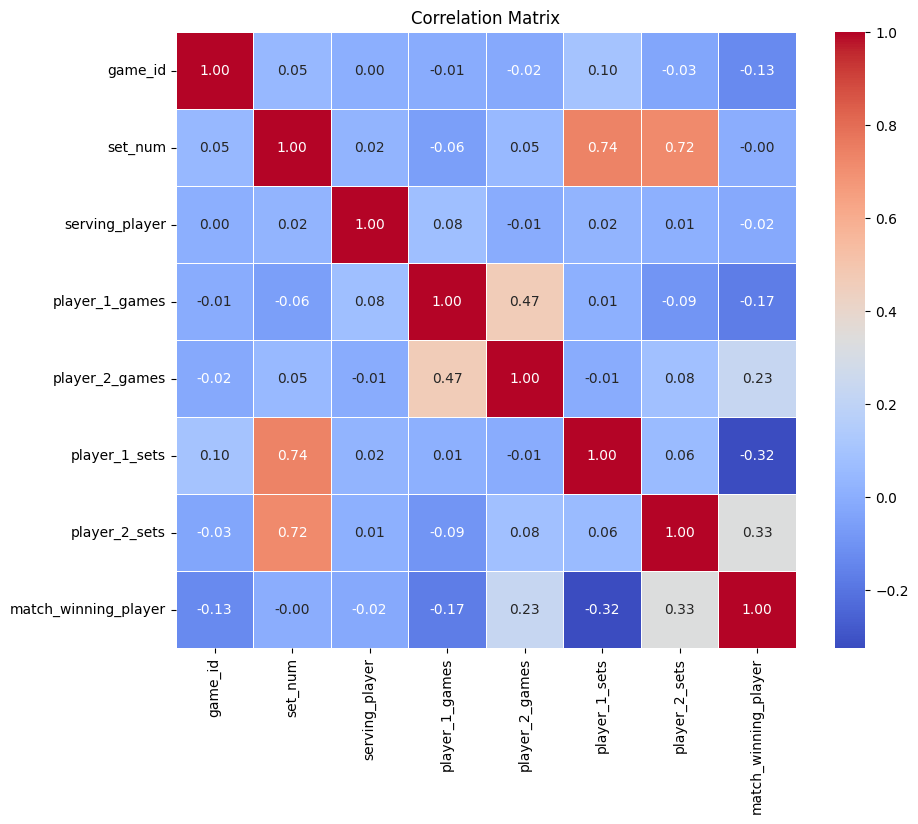

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [20]:
correlation_matrix['match_winning_player']

game_id                -0.131036
set_num                -0.001306
serving_player         -0.017317
player_1_games         -0.173815
player_2_games          0.230151
player_1_sets          -0.324011
player_2_sets           0.333413
match_winning_player    1.000000
Name: match_winning_player, dtype: float64

**set_num and match_winning_player (-0.001306)**:
The correlation between `set_num` and `match_winning_player` is very close to zero, indicating a very weak correlation. The set number doesn't seem to have a significant linear relationship with the likelihood of a player winning the match.

**serving_player and match_winning_player (-0.017317)**:
Similarly, the correlation between `serving_player` and `match_winning_player` is very close to zero. The player who is serving at any given moment does not show a strong linear correlation with the probability of winning the match.

**player_1_games and match_winning_player (-0.173815)**:
The correlation between `player_1_games` and `match_winning_player` is negative, suggesting that as Player 1 wins more games, the probability of Player 1 winning the match decreases. However, the correlation is not very strong.

**player_2_games and match_winning_player (0.230151)**:
The correlation between `player_2_games` and `match_winning_player` is positive, indicating that as Player 2 wins more games, the probability of Player 1 winning the match increases. This correlation is stronger than the one for `player_1_games`.

**player_1_sets and match_winning_player (-0.324011)**:
The correlation between `player_1_sets` and `match_winning_player` is negative, suggesting that as Player 1 wins more sets, the probability of Player 1 winning the match decreases. This correlation is stronger than the game-related correlations.

**player_2_sets and match_winning_player (0.333413)**:
The correlation between `player_2_sets` and `match_winning_player` is positive, indicating that as Player 2 wins more sets, the probability of Player 1 winning the match increases. This correlation is stronger than the one for `player_1_sets`.

### Pairplot Analysis

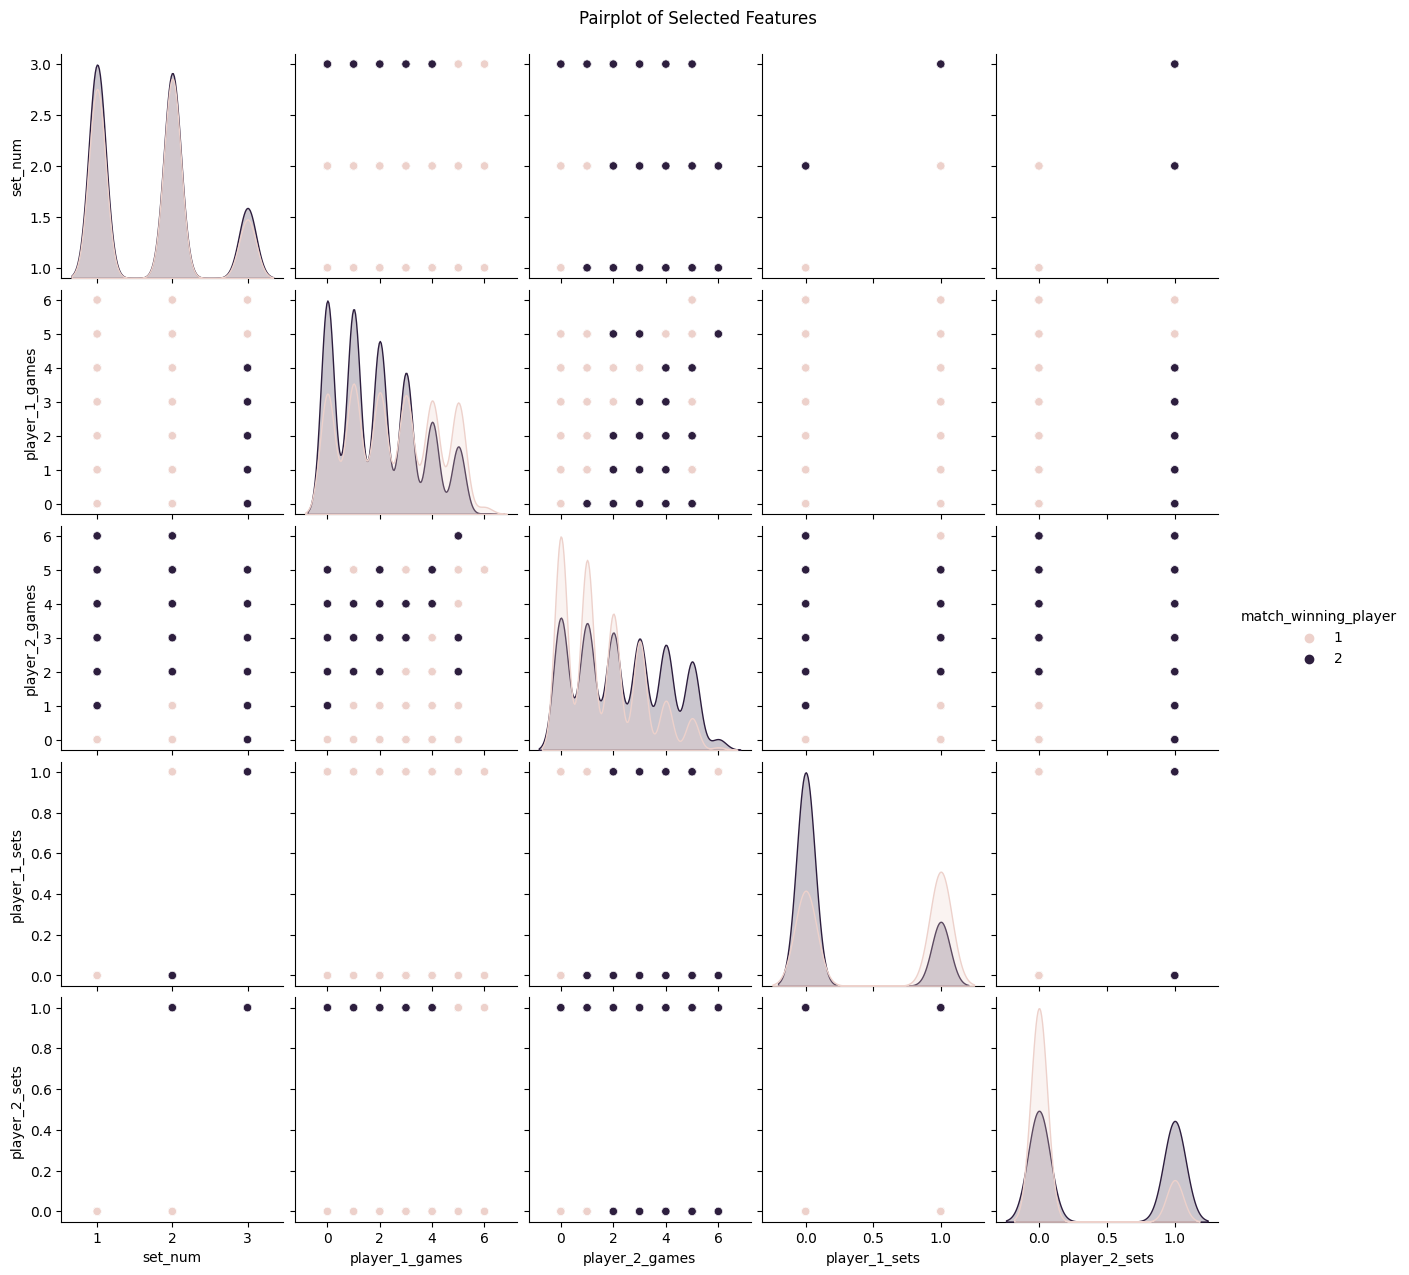

In [21]:
sns.pairplot(df[['set_num', 'player_1_points', 'player_2_points', 'player_1_games', 'player_2_games',
                 'player_1_sets', 'player_2_sets', 'match_winning_player']], hue='match_winning_player')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

Above plot allows us to visually inspect if there are patterns or clusters related to the match outcome. We can observe that certain combinations of feature values are associated with a higher probability of Player 1 or Player 2 winning. Hence these are important variables for machine learning modeling.

### Distribution of Target Variable

Both players have almost equal number rows. So the dataset is balanced.

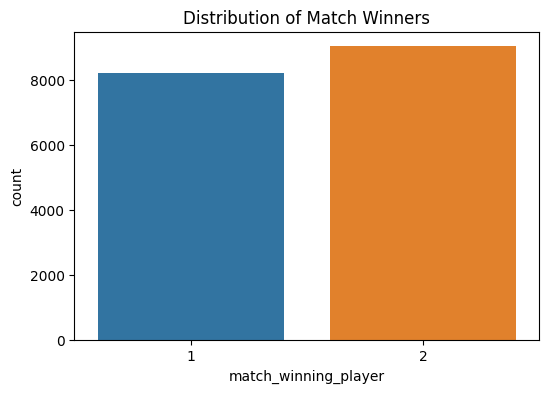

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x='match_winning_player', data=df)
plt.title('Distribution of Match Winners')
plt.show()

### Distribution of serving_player

Text(0.5, 1.0, 'Distribution of Serving Player')

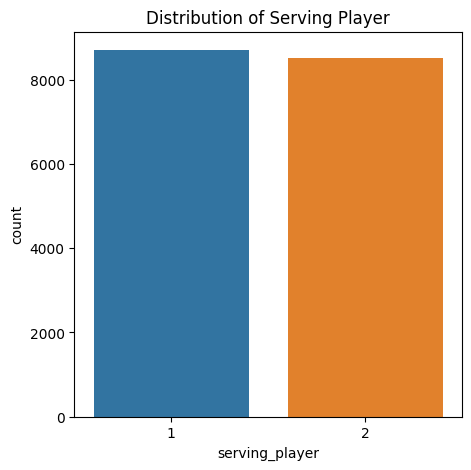

In [50]:
plt.figure(figsize=(5, 5))
sns.countplot(x='serving_player', data=df)
plt.title('Distribution of Serving Player')

### Distribution of set_num

Text(0.5, 1.0, 'Distribution of Set Number')

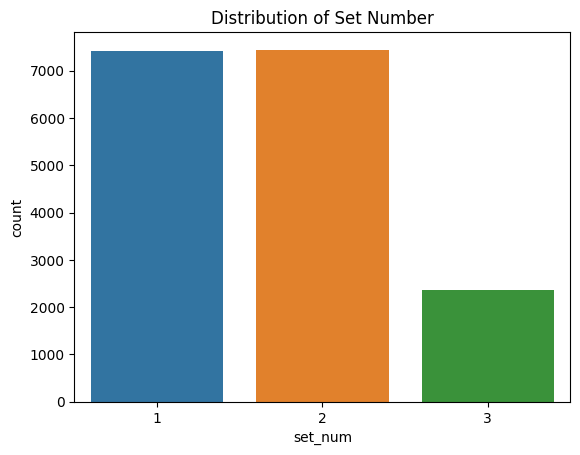

In [51]:
sns.countplot(x='set_num', data=df)
plt.title('Distribution of Set Number')

### Game and Set Statistics Over Time (game_id and set_num)

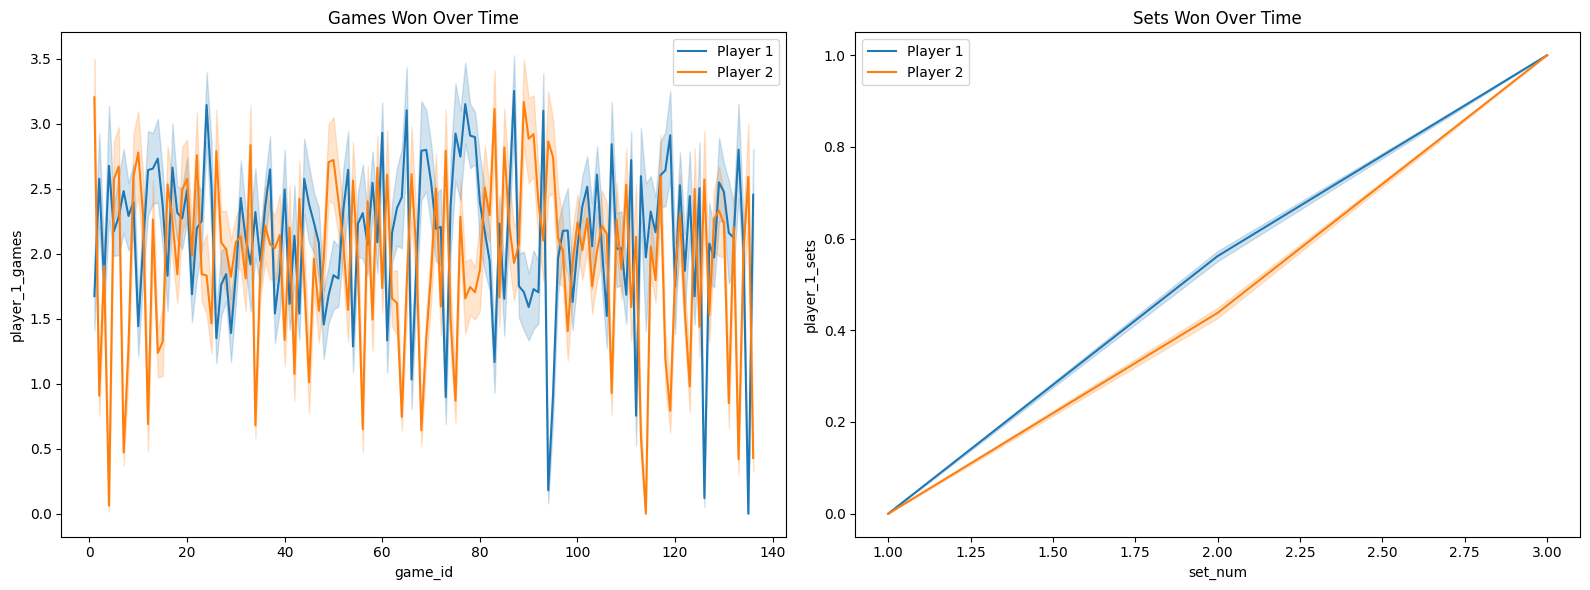

In [52]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='game_id', y='player_1_games', data=df, label='Player 1')
sns.lineplot(x='game_id', y='player_2_games', data=df, label='Player 2')
plt.title('Games Won Over Time')

plt.subplot(1, 2, 2)
sns.lineplot(x='set_num', y='player_1_sets', data=df, label='Player 1')
sns.lineplot(x='set_num', y='player_2_sets', data=df, label='Player 2')
plt.title('Sets Won Over Time')

plt.tight_layout()
plt.show()

### Player Performance

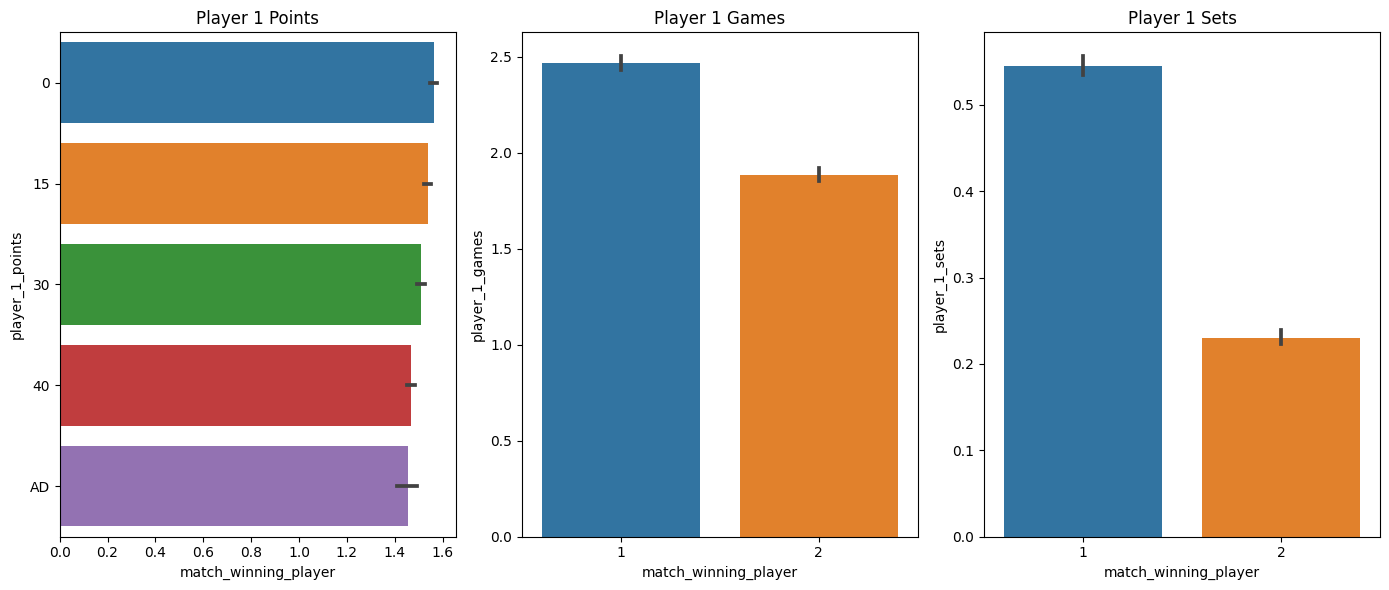

In [53]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.barplot(x='match_winning_player', y='player_1_points', data=df)
plt.title('Player 1 Points')

plt.subplot(1, 3, 2)
sns.barplot(x='match_winning_player', y='player_1_games', data=df)
plt.title('Player 1 Games')

plt.subplot(1, 3, 3)
sns.barplot(x='match_winning_player', y='player_1_sets', data=df)
plt.title('Player 1 Sets')

plt.tight_layout()
plt.show()

### Remove Columns

Remove following columns because they are IDs

- game_id
- set_num

In [57]:
training_data = df.drop(columns=['game_id', 'set_num'])

training_data_results = df_4_results.drop(columns=['game_id', 'set_num'])

training_data.head()

,serving_player,player_1_points,player_2_points,player_1_games,player_2_games,player_1_sets,player_2_sets,match_winning_player
0,1,0,0,0,0,0,0,2
1,1,15,0,0,0,0,0,2
2,1,15,15,0,0,0,0,2
3,1,30,15,0,0,0,0,2
4,1,40,15,0,0,0,0,2


### Create Three New Features

- if player_1_points == player_2_points ---> add new column equal_points = 1, otherwise 0
- if player_1_games == player_2_games ---> add new column equal_games = 1, otherwise 0
- if player_1_sets == player_2_sets ---> add new column equal_sets = 1, otherwise 0

In [58]:
training_data.loc[training_data['player_1_points'] == training_data['player_2_points'], "equal_points"] = 1
training_data['equal_points'] = training_data['equal_points'].fillna(0)

training_data.loc[training_data['player_1_games'] == training_data['player_2_games'], "equal_games"] = 1
training_data['equal_games'] = training_data['equal_games'].fillna(0)

training_data.loc[training_data['player_1_sets'] == training_data['player_2_sets'], "equal_sets"] = 1
training_data['equal_sets'] = training_data['equal_sets'].fillna(0)

# data for producing results then
training_data_results.loc[training_data_results['player_1_points'] == training_data_results['player_2_points'], "equal_points"] = 1
training_data_results['equal_points'] = training_data_results['equal_points'].fillna(0)

training_data_results.loc[training_data_results['player_1_games'] == training_data_results['player_2_games'], "equal_games"] = 1
training_data_results['equal_games'] = training_data_results['equal_games'].fillna(0)

training_data_results.loc[training_data_results['player_1_sets'] == training_data_results['player_2_sets'], "equal_sets"] = 1
training_data_results['equal_sets'] = training_data_results['equal_sets'].fillna(0)

training_data.head()

,serving_player,player_1_points,player_2_points,player_1_games,player_2_games,player_1_sets,player_2_sets,match_winning_player,equal_points,equal_games,equal_sets
0,1,0,0,0,0,0,0,2,1.0,1.0,1.0
1,1,15,0,0,0,0,0,2,0.0,1.0,1.0
2,1,15,15,0,0,0,0,2,1.0,1.0,1.0
3,1,30,15,0,0,0,0,2,0.0,1.0,1.0
4,1,40,15,0,0,0,0,2,0.0,1.0,1.0


### 2 New Features

**Game Difference Between Players**:
Create a feature indicating the difference in the number of games won by Player 1 and Player 2: player_1_games - player_2_games. This feature could provide information about the overall performance in terms of games.

**Set Difference Between Players**:
Similar to the game difference, create a feature representing the difference in the number of sets won by Player 1 and Player 2: player_1_sets - player_2_sets. This may capture the overall dominance of one player over the other in sets.

In [59]:
training_data['game_difference (1 - 2)'] = training_data['player_1_games'] - training_data['player_2_games']
training_data['set_difference (1 - 2)'] = training_data['player_1_sets'] - training_data['player_2_sets']

training_data_results['game_difference (1 - 2)'] = training_data_results['player_1_games'] - training_data_results['player_2_games']
training_data_results['set_difference (1 - 2)'] = training_data_results['player_1_sets'] - training_data_results['player_2_sets']

training_data.head()

,serving_player,player_1_points,player_2_points,player_1_games,player_2_games,player_1_sets,player_2_sets,match_winning_player,equal_points,equal_games,equal_sets,game_difference (1 - 2),set_difference (1 - 2)
0,1,0,0,0,0,0,0,2,1.0,1.0,1.0,0,0
1,1,15,0,0,0,0,0,2,0.0,1.0,1.0,0,0
2,1,15,15,0,0,0,0,2,1.0,1.0,1.0,0,0
3,1,30,15,0,0,0,0,2,0.0,1.0,1.0,0,0
4,1,40,15,0,0,0,0,2,0.0,1.0,1.0,0,0


### Machine Learning Modeling

In [26]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### ML Pipeline

- Machine Learning Pipeline do following
    - Split data into training set (70%) and testing set (30%)
    - Check for categorical variables, if there it will apply one hot encoding
    - It will fill missing values by MOST FREQUESNT approach
    - Apply ML models
    - Evaluate model by printing classification report and confusion report
    - Calculate feature importance

In [27]:
def train_model(X, y, model_name):
      
    categorical_cols = list(X.select_dtypes(include=['object', 'category']).columns)
    numeric_cols = X.drop(columns=categorical_cols).columns.tolist()

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Create the preprocessing pipeline for categorical columns
    cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    # Create the column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', cat_pipeline, categorical_cols),
            ('num', 'passthrough', numeric_cols)
        ])
    
    # Create the Classifier
    if model_name == "RF":
        classifier = RandomForestClassifier(n_estimators=1000)
    elif model_name == "SVC":
        classifier = SVC(probability=True)
    elif model_name == "LR":
        classifier = LogisticRegression()
    else:
        classifier = DecisionTreeClassifier()
        
    # Create the final pipeline by combining the preprocessor and the classifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Predict the target values on the test data using the fitted pipeline
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {round(accuracy,2)}\n')
    
    # Generate and print the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Generate and plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    
    return pipeline

### Features and Target Variable

In [60]:
X = training_data.drop(columns=['match_winning_player'])

X_results = training_data_results.drop(columns=['match_winning_player'])

y = training_data['match_winning_player']

### Random Forest Classifier

Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.75      0.72      2450
           2       0.76      0.70      0.73      2717

    accuracy                           0.72      5167
   macro avg       0.72      0.72      0.72      5167
weighted avg       0.73      0.72      0.72      5167



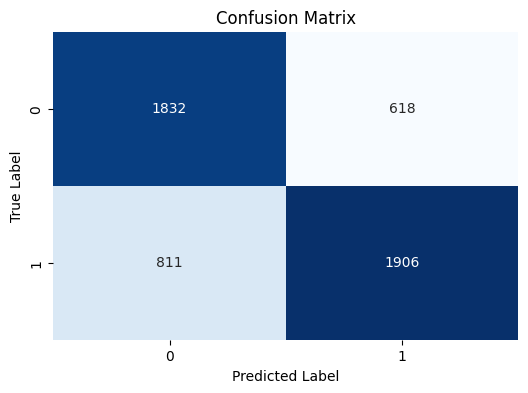

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['player_1_points',
                                                   'player_2_points']),
                                                 ('num', 'passthrough',
                                                  ['serving_player',
                                                   'player_1_games',
                                                   'player_2_games',
                                                   'player_1_sets',
                                                   'player_2_sets',
                                                   'equal_points',
                                                   'equal_games', 'equal_sets',
                                                   'game_difference (1 - 2)',
                                                   'set_difference (1 - '
                                                   '2)'])])),
                ('classifier', RandomForestClassifier(n_estimators=1000))])

In [29]:
rf_pipeline = train_model(X, y, "RF")
rf_pipeline

### Decision Tree Classifier

Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.77      0.72      2450
           2       0.76      0.67      0.71      2717

    accuracy                           0.72      5167
   macro avg       0.72      0.72      0.72      5167
weighted avg       0.72      0.72      0.72      5167



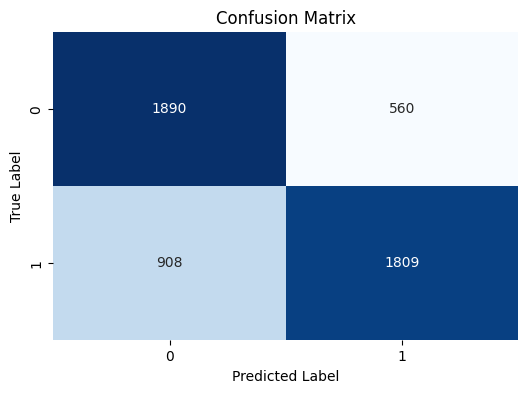

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['player_1_points',
                                                   'player_2_points']),
                                                 ('num', 'passthrough',
                                                  ['serving_player',
                                                   'player_1_games',
                                                   'player_2_games',
                                                   'player_1_sets',
                                                   'player_2_sets',
                                                   'equal_points',
                                                   'equal_games', 'equal_sets',
                                                   'game_difference (1 - 2)',
                                                   'set_difference (1 - '
                                                   '2)'])])),
                ('classifier', DecisionTreeClassifier())])

In [30]:
dt_pipeline = train_model(X, y, "DT")
dt_pipeline

### Support Vector Machines Classifier

Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.75      0.75      2450
           2       0.77      0.76      0.77      2717

    accuracy                           0.76      5167
   macro avg       0.76      0.76      0.76      5167
weighted avg       0.76      0.76      0.76      5167



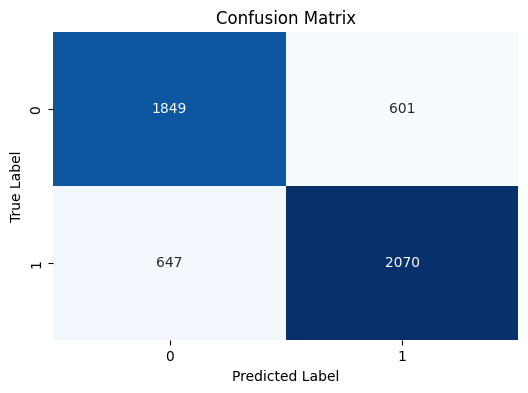

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['player_1_points',
                                                   'player_2_points']),
                                                 ('num', 'passthrough',
                                                  ['serving_player',
                                                   'player_1_games',
                                                   'player_2_games',
                                                   'player_1_sets',
                                                   'player_2_sets',
                                                   'equal_points',
                                                   'equal_games', 'equal_sets',
                                                   'game_difference (1 - 2)',
                                                   'set_difference (1 - '
                                                   '2)'])])),
                ('classifier', SVC(probability=True))])

In [31]:
svc_pipeline = train_model(X, y, "SVC")
svc_pipeline

### Linear Regression Classifier

Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.77      0.75      2450
           2       0.78      0.75      0.77      2717

    accuracy                           0.76      5167
   macro avg       0.76      0.76      0.76      5167
weighted avg       0.76      0.76      0.76      5167



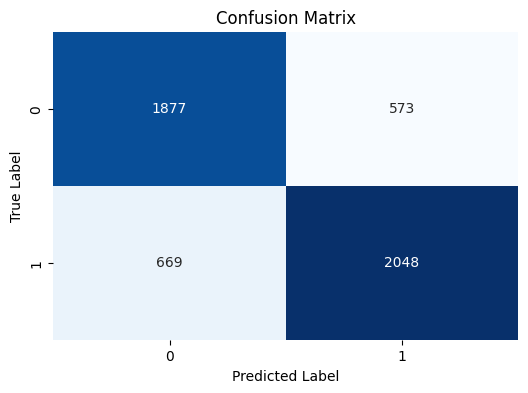

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['player_1_points',
                                                   'player_2_points']),
                                                 ('num', 'passthrough',
                                                  ['serving_player',
                                                   'player_1_games',
                                                   'player_2_games',
                                                   'player_1_sets',
                                                   'player_2_sets',
                                                   'equal_points',
                                                   'equal_games', 'equal_sets',
                                                   'game_difference (1 - 2)',
                                                   'set_difference (1 - '
                                                   '2)'])])),
                ('classifier', LogisticRegression())])

In [32]:
lr_pipeline = train_model(X, y, "LR")
lr_pipeline

### Comparative Analysis of ML Models

|Model Name|Accuracy|Precision|Recall|F1 Measure|
|---|---|---|---|---|
|Random Forest|72%|72%|72%|72%|
|Decision Tree|71%|72%|72%|71%|
|Support Vector Machines|76%|76%|76%|76%|
|Logistic Regression|76%|76%|76%|76%|

The performance of Linear Regression and Support Vector Machines are almost same, but at class level and execution time, Linear Regression is best model in this case.

### How to save model?

In [33]:
import joblib
model_filename = 'lr_pipeline_model.joblib'
joblib.dump(lr_pipeline, model_filename)

['lr_pipeline_model.joblib']

### How to load model?

In [34]:
import joblib
model_filename = 'lr_pipeline_model.joblib'
lr_pipeline = joblib.load(model_filename)
lr_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['player_1_points',
                                                   'player_2_points']),
                                                 ('num', 'passthrough',
                                                  ['serving_player',
                                                   'player_1_games',
                                                   'player_2_games',
                                                   'player_1_sets',
                                                   'player_2_sets',
                                                   'equal_points',
                                                   'equal_games', 'equal_sets',
                                                   'game_difference (1 - 2)',
                                                   'set_difference (1 - '
                                                   '2)'])])),
                ('classifier', LogisticRegression())])

### Given the current state of a match, what is the probability that player 1 will win?

In [61]:
# Probabilities of class 1 (Player 1 winning)
y_pred_proba = lr_pipeline.predict_proba(X_results)[:, 1]  

In [62]:
result = pd.DataFrame(data=y_pred_proba.reshape(-1, 1), columns=['Probabilities of class 1 (Player 1 winning)'])
result['Probabilities of class 1 (Player 1 winning)'] = result['Probabilities of class 1 (Player 1 winning)'].round(2)
result

,Probabilities of class 1 (Player 1 winning)
0,0.55
1,0.51
2,0.55
3,0.52
4,0.43
...,...
18500,0.02
18501,0.01
18502,0.02
18503,0.01


In [63]:
result.to_csv("Probability_Player_1_Winning.csv", index=False)